In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
%cd ./drive/My Drive/Colab Notebooks/CNN/CIFAR10_Classifier
%pwd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: './drive/My Drive/Colab Notebooks/CNN/CNN_CIFAR100_Classifier/notebooks'
/content/drive/My Drive/Colab Notebooks/CNN/CNN_CIFAR100_Classifier/notebooks
CIFAR10_CLASSIFIER_LENET.ipynb  elephant.jpg  Untitled0.ipynb


Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar100

#CIFAR-100


The CIFAR-100 dataset consists of 60000 32x32 colour images in 100 classes, with 600 images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). There are 50000 training images and 10000 test images.
The meta file contains the label names of each class and superclass.

It became a popular benchmark for machine learning research due to its small size, balanced classes and varied images

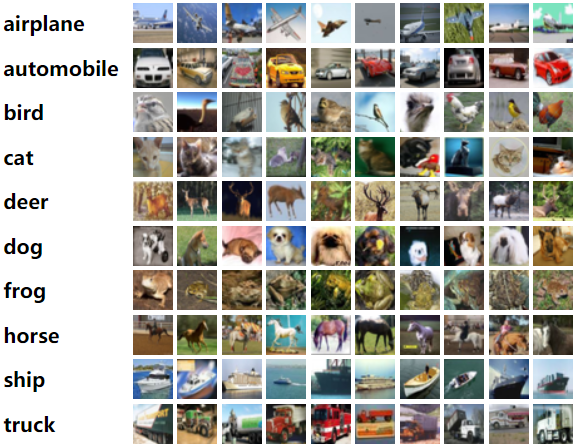

In [2]:
(x_train, y_train), (x_test, y_test)= cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [3]:
classes = {0: 'apple',
 1: 'aquarium_fish',
 2: 'baby',
 3: 'bear',
 4: 'beaver',
 5: 'bed',
 6: 'bee',
 7: 'beetle',
 8: 'bicycle',
 9: 'bottle',
 10: 'bowl',
 11: 'boy',
 12: 'bridge',
 13: 'bus',
 14: 'butterfly',
 15: 'camel',
 16: 'can',
 17: 'castle',
 18: 'caterpillar',
 19: 'cattle',
 20: 'chair',
 21: 'chimpanzee',
 22: 'clock',
 23: 'cloud',
 24: 'cockroach',
 25: 'couch',
 26: 'crab',
 27: 'crocodile',
 28: 'cup',
 29: 'dinosaur',
 30: 'dolphin',
 31: 'elephant',
 32: 'flatfish',
 33: 'forest',
 34: 'fox',
 35: 'girl',
 36: 'hamster',
 37: 'house',
 38: 'kangaroo',
 39: 'computer_keyboard',
 40: 'lamp',
 41: 'lawn_mower',
 42: 'leopard',
 43: 'lion',
 44: 'lizard',
 45: 'lobster',
 46: 'man',
 47: 'maple_tree',
 48: 'motorcycle',
 49: 'mountain',
 50: 'mouse',
 51: 'mushroom',
 52: 'oak_tree',
 53: 'orange',
 54: 'orchid',
 55: 'otter',
 56: 'palm_tree',
 57: 'pear',
 58: 'pickup_truck',
 59: 'pine_tree',
 60: 'plain',
 61: 'plate',
 62: 'poppy',
 63: 'porcupine',
 64: 'possum',
 65: 'rabbit',
 66: 'raccoon',
 67: 'ray',
 68: 'road',
 69: 'rocket',
 70: 'rose',
 71: 'sea',
 72: 'seal',
 73: 'shark',
 74: 'shrew',
 75: 'skunk',
 76: 'skyscraper',
 77: 'snail',
 78: 'snake',
 79: 'spider',
 80: 'squirrel',
 81: 'streetcar',
 82: 'sunflower',
 83: 'sweet_pepper',
 84: 'table',
 85: 'tank',
 86: 'telephone',
 87: 'television',
 88: 'tiger',
 89: 'tractor',
 90: 'train',
 91: 'trout',
 92: 'tulip',
 93: 'turtle',
 94: 'wardrobe',
 95: 'whale',
 96: 'willow_tree',
 97: 'wolf',
 98: 'woman',
 99: 'worm'}

#Exploratory data analysis (EDA)

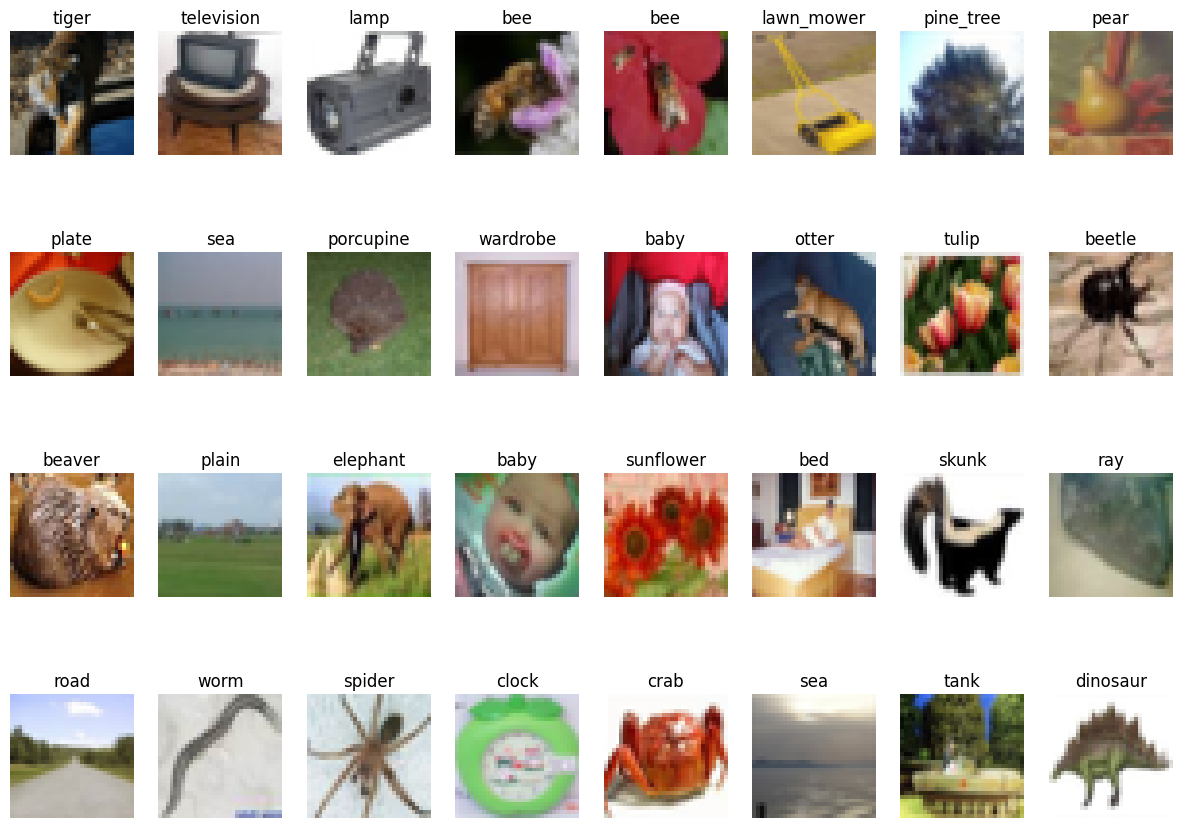

In [13]:
train = np.argmax(y_train, axis=1)
cols = 8
rows = 4
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid("off")
        ax.axis("off")
        ax.imshow(x_train[random_index, :])
        label = classes[y_train[random_index][0]]
        ax.set_title(label)
plt.show()

In [55]:
unique, counts = np.unique(y_train, return_counts=True)
for i in range(np.max(y_train)):
  print(f'Number of samples in training dataset for {classes[i]} class are : {counts[i]}')

Number of samples in training dataset for apple class are : 500
Number of samples in training dataset for aquarium_fish class are : 500
Number of samples in training dataset for baby class are : 500
Number of samples in training dataset for bear class are : 500
Number of samples in training dataset for beaver class are : 500
Number of samples in training dataset for bed class are : 500
Number of samples in training dataset for bee class are : 500
Number of samples in training dataset for beetle class are : 500
Number of samples in training dataset for bicycle class are : 500
Number of samples in training dataset for bottle class are : 500
Number of samples in training dataset for bowl class are : 500
Number of samples in training dataset for boy class are : 500
Number of samples in training dataset for bridge class are : 500
Number of samples in training dataset for bus class are : 500
Number of samples in training dataset for butterfly class are : 500
Number of samples in training dat

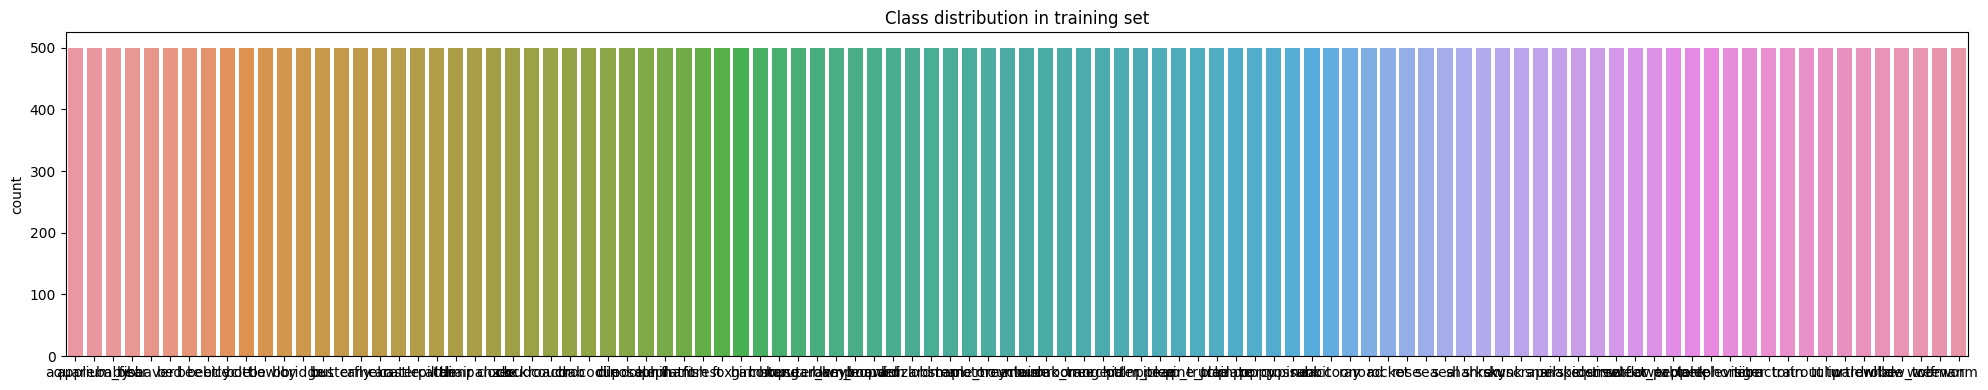

In [6]:
#Distribution for each class in train dataset

plt.figure(figsize=(20,4))
#sns.barplot( counts)#, legend = classes_name)
sns.countplot(x = y_train[:,0]).set(xticklabels = classes.values())
plt.title('Class distribution in training set')
plt.tight_layout()
#plt.savefig(os.path.join(
#                    os.getcwd(),
#                    "data/Class distribution training set CIFAR100.jpg"
#                ))
plt.show()

In [8]:
unique, counts = np.unique(y_test, return_counts=True)
for i in range(np.max(y_test)):
  print(f'Number of samples in training dataset for {classes[i]} class are : {counts[i]}')

Number of samples in training dataset for apple class are : 100
Number of samples in training dataset for aquarium_fish class are : 100
Number of samples in training dataset for baby class are : 100
Number of samples in training dataset for bear class are : 100
Number of samples in training dataset for beaver class are : 100
Number of samples in training dataset for bed class are : 100
Number of samples in training dataset for bee class are : 100
Number of samples in training dataset for beetle class are : 100
Number of samples in training dataset for bicycle class are : 100
Number of samples in training dataset for bottle class are : 100
Number of samples in training dataset for bowl class are : 100
Number of samples in training dataset for boy class are : 100
Number of samples in training dataset for bridge class are : 100
Number of samples in training dataset for bus class are : 100
Number of samples in training dataset for butterfly class are : 100
Number of samples in training dat

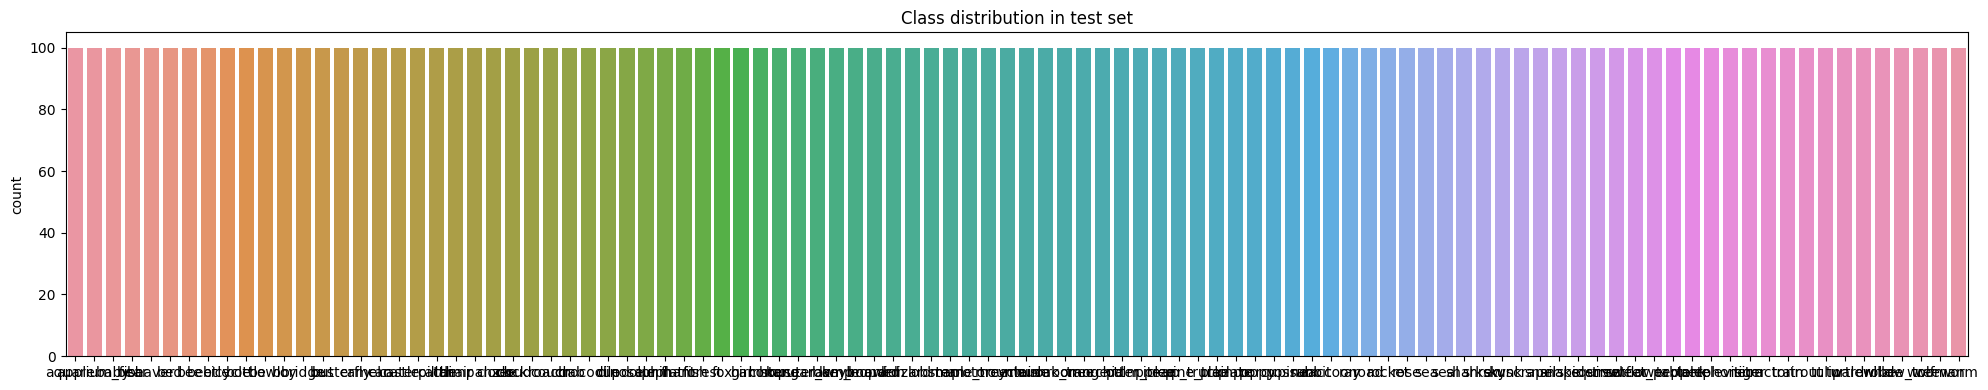

In [7]:
#Distribution for each class in test dataset
plt.figure(figsize=(20,4))
sns.countplot(x = y_test[:,0]).set(xticklabels = classes.values())
plt.title('Class distribution in test set')
plt.tight_layout()
#plt.savefig(os.path.join(
#                    os.getcwd(),
#                    "data/Class distribution test set CIFAR10.jpg"
#                ))
plt.show()

We can see that data in train and test set is balanced for each class, which means the number of samples  in the dataset for each class is approximately equal.

Having a balanced dataset is important because it can lead to:
1. Overfitting: when a class has much more samples than a minority class, the model can overfit to the majority class and is not able to recognize properly the minority class, due to under-sampling; this results in poor performance.
2. Accuracy: performance metrics can be misleading for imbalanced datasets. If a model predicts the majority class for all instances, it will achieve high accuracy even though it is not making any meaningful predictions for the under-sampled data.
3. Difficulty learning minority class patterns: With limited samples of the minority class, the model may struggle to identify the unique patterns that distinguish it from the majority class.